In [ ]:
import pandas as pd 
df=pd.read_csv('/home/mohaddese/data science/diamonds.csv', delimiter=";")

df.head()

,",""carat"",""cut"",""color"",""clarity"",""depth"",""table"",""price"",""x"",""y"",""z"""
0,"1,0.23,""Ideal"",""E"",""SI2"",61.5,55,326,3.95,3.98..."
1,"2,0.21,""Premium"",""E"",""SI1"",59.8,61,326,3.89,3...."
2,"3,0.23,""Good"",""E"",""VS1"",56.9,65,327,4.05,4.07,..."
3,"4,0.29,""Premium"",""I"",""VS2"",62.4,58,334,4.2,4.2..."
4,"5,0.31,""Good"",""J"",""SI2"",63.3,58,335,4.34,4.35,..."


In [147]:
import pandas as pd
df = pd.read_csv('/home/mohaddese/data science/diamonds.csv', skipinitialspace=True)
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [148]:
print(df["cut"].unique())
print(df['clarity'].unique())
print(df['color'].unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']
['E' 'I' 'J' 'H' 'F' 'G' 'D']


In [149]:

from sklearn.preprocessing import OrdinalEncoder

cut_categories = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_categories = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_categories = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

encoder = OrdinalEncoder(categories=[cut_categories, clarity_categories, color_categories])

ordinal_encoded = encoder.fit_transform(df[['cut', 'clarity', 'color']])


ordinal_encoded_df = pd.DataFrame(ordinal_encoded, columns = encoder.get_feature_names_out(['cut','clarity', 'color']))
print(ordinal_encoded_df.head())


df_ordinal_encoded = pd.concat([df.drop(['cut', 'clarity', 'color'], axis=1), ordinal_encoded_df], axis=1)
df = df_ordinal_encoded
df.head(12)


   cut  clarity  color
0  4.0      1.0    5.0
1  3.0      2.0    5.0
2  1.0      4.0    5.0
3  3.0      3.0    1.0
4  1.0      1.0    0.0


,Unnamed: 0,carat,depth,table,price,x,y,z,cut,clarity,color
0,1,0.23,61.5,55.0,326,3.95,3.98,2.43,4.0,1.0,5.0
1,2,0.21,59.8,61.0,326,3.89,3.84,2.31,3.0,2.0,5.0
2,3,0.23,56.9,65.0,327,4.05,4.07,2.31,1.0,4.0,5.0
3,4,0.29,62.4,58.0,334,4.20,4.23,2.63,3.0,3.0,1.0
4,5,0.31,63.3,58.0,335,4.34,4.35,2.75,1.0,1.0,0.0
5,6,0.24,62.8,57.0,336,3.94,3.96,2.48,2.0,5.0,0.0
6,7,0.24,62.3,57.0,336,3.95,3.98,2.47,2.0,6.0,1.0
7,8,0.26,61.9,55.0,337,4.07,4.11,2.53,2.0,2.0,2.0
8,9,0.22,65.1,61.0,337,3.87,3.78,2.49,0.0,3.0,5.0
9,10,0.23,59.4,61.0,338,4.00,4.05,2.39,2.0,4.0,2.0


In [150]:
df['price_per_carat'] = df['price'] / df['carat']
df['volume'] = df['x'] * df['y'] * df['z']
df['form_factor'] = df['x'] / df['y']
df['price_to_volume'] = df['price'] / df['volume']
df['mean_dimension'] = (df['x'] + df['y'] + df['z']) / 3
df['table_to_depth_ratio'] = df['table'] / df['depth']
df.head()


,Unnamed: 0,carat,depth,table,price,x,y,z,cut,clarity,color,price_per_carat,volume,form_factor,price_to_volume,mean_dimension,table_to_depth_ratio
0,1,0.23,61.5,55.0,326,3.95,3.98,2.43,4.0,1.0,5.0,1417.391304,38.202030,0.992462,8.533578,3.453333,0.894309
1,2,0.21,59.8,61.0,326,3.89,3.84,2.31,3.0,2.0,5.0,1552.380952,34.505856,1.013021,9.447672,3.346667,1.020067
2,3,0.23,56.9,65.0,327,4.05,4.07,2.31,1.0,4.0,5.0,1421.739130,38.076885,0.995086,8.587887,3.476667,1.142355
3,4,0.29,62.4,58.0,334,4.20,4.23,2.63,3.0,3.0,1.0,1151.724138,46.724580,0.992908,7.148272,3.686667,0.929487
4,5,0.31,63.3,58.0,335,4.34,4.35,2.75,1.0,1.0,0.0,1080.645161,51.917250,0.997701,6.452576,3.813333,0.916272


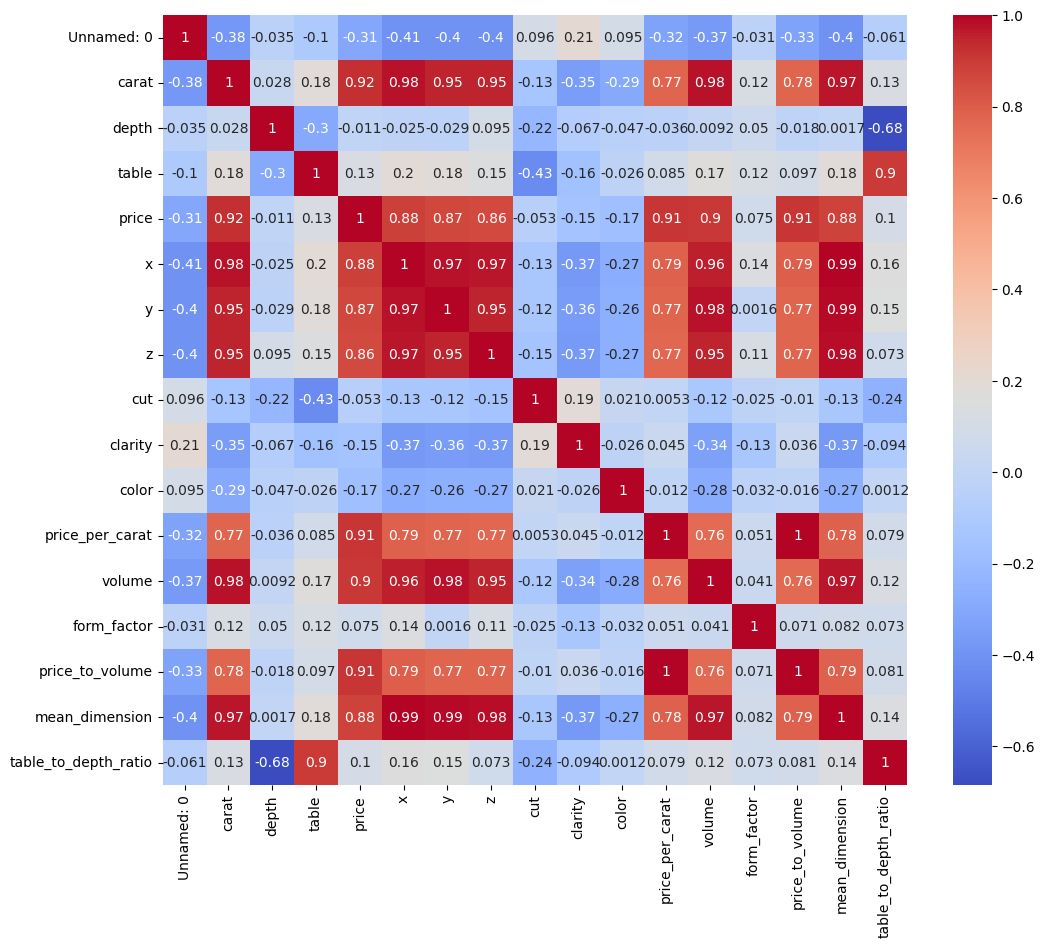

,Unnamed: 0,carat,table,price,x,y,z,clarity,color,price_per_carat,volume,price_to_volume,mean_dimension,table_to_depth_ratio
0,1,0.23,55.0,326,3.95,3.98,2.43,1.0,5.0,1417.391304,38.202030,8.533578,3.453333,0.894309
1,2,0.21,61.0,326,3.89,3.84,2.31,2.0,5.0,1552.380952,34.505856,9.447672,3.346667,1.020067
2,3,0.23,65.0,327,4.05,4.07,2.31,4.0,5.0,1421.739130,38.076885,8.587887,3.476667,1.142355
3,4,0.29,58.0,334,4.20,4.23,2.63,3.0,1.0,1151.724138,46.724580,7.148272,3.686667,0.929487
4,5,0.31,58.0,335,4.34,4.35,2.75,1.0,0.0,1080.645161,51.917250,6.452576,3.813333,0.916272


In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

corr_with_target = correlation_matrix['price'].abs()
threshold = 0.1
selected_features = corr_with_target[corr_with_target > threshold].index.tolist()

df_selected = df[selected_features]
df_selected.head()


In [152]:
df_selected = df_selected.drop(columns=['Unnamed: 0'], errors='ignore') #unnamed wird entfernt
df= df_selected
df.head()

,carat,table,price,x,y,z,clarity,color,price_per_carat,volume,price_to_volume,mean_dimension,table_to_depth_ratio
0,0.23,55.0,326,3.95,3.98,2.43,1.0,5.0,1417.391304,38.202030,8.533578,3.453333,0.894309
1,0.21,61.0,326,3.89,3.84,2.31,2.0,5.0,1552.380952,34.505856,9.447672,3.346667,1.020067
2,0.23,65.0,327,4.05,4.07,2.31,4.0,5.0,1421.739130,38.076885,8.587887,3.476667,1.142355
3,0.29,58.0,334,4.20,4.23,2.63,3.0,1.0,1151.724138,46.724580,7.148272,3.686667,0.929487
4,0.31,58.0,335,4.34,4.35,2.75,1.0,0.0,1080.645161,51.917250,6.452576,3.813333,0.916272


In [153]:
from sklearn.model_selection import train_test_split

y= df['price']                                                                                              #daten wurden in features x und zielwert y sowie in Trainings- und Testsets aufgeteilt 
X= df.drop(columns=['price'])

X_train, X_test, y_test, y_train = train_test_split(X,y, test_size=0.2, random_state=42)


In [159]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Überprüfe die Daten auf fehlende Werte
print("Anzahl fehlender Werte in den Features:")
print(df.isnull().sum())

# Entferne Zeilen mit fehlenden Werten
df = df.dropna()

# Überprüfe die Daten auf nicht-numerische Werte
print("Datentypen der Features:")
print(df.dtypes)

# Initialisiere den StandardScaler
scaler = StandardScaler()




Anzahl fehlender Werte in den Features:
carat                   0
table                   0
price                   0
x                       0
y                       0
z                       0
clarity                 0
color                   0
price_per_carat         0
volume                  0
price_to_volume         0
mean_dimension          0
table_to_depth_ratio    0
dtype: int64
Datentypen der Features:
carat                   float64
table                   float64
price                     int64
x                       float64
y                       float64
z                       float64
clarity                 float64
color                   float64
price_per_carat         float64
volume                  float64
price_to_volume         float64
mean_dimension          float64
table_to_depth_ratio    float64
dtype: object


In [160]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

# Ersetze unendliche Werte durch NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Überprüfe auf unendliche Werte
print("Anzahl unendlicher Werte in den Features:")
print(df.isin([np.inf, -np.inf]).sum())

# Entferne Zeilen mit NaN-Werten
df.dropna(inplace=True)

# Überprüfe die Daten auf nicht-numerische Werte
print("Datentypen der Features:")
print(df.dtypes)

# Initialisiere den StandardScaler
scaler = StandardScaler()

# Auswahl der Features und Zielwert
X = df.drop('price', axis=1)
y = df['price']

# Fitte und transformiere die Daten
X_scaled = scaler.fit_transform(X)

# Neuer DataFrame mit den skalierten Daten
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled['price'] = y

# Zeige die ersten Zeilen des neuen DataFrames
print("Erste Zeilen des skalierten DataFrames:")
print(df_scaled.head())


Anzahl unendlicher Werte in den Features:
carat                   0
table                   0
price                   0
x                       0
y                       0
z                       0
clarity                 0
color                   0
price_per_carat         0
volume                  0
price_to_volume         0
mean_dimension          0
table_to_depth_ratio    0
dtype: int64
Datentypen der Features:
carat                   float64
table                   float64
price                     int64
x                       float64
y                       float64
z                       float64
clarity                 float64
color                   float64
price_per_carat         float64
volume                  float64
price_to_volume         float64
mean_dimension          float64
table_to_depth_ratio    float64
dtype: object
Erste Zeilen des skalierten DataFrames:
      carat     table         x         y         z   clarity     color  \
0 -1.198204 -1.099725 -1.591573 -1.53

In [161]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Ersetze unendliche Werte durch NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Überprüfe auf unendliche Werte
print("Anzahl unendlicher Werte in den Features:")
print(df.isin([np.inf, -np.inf]).sum())

# Entferne Zeilen mit NaN-Werten
df.dropna(inplace=True)

# Überprüfe auf extreme Werte
print("Maximale Werte in den Features:")
print(df.max())

print("Minimale Werte in den Features:")
print(df.min())

# Korrigiere extreme Werte
extreme_cols = ['price_to_volume', 'table_to_depth_ratio']
for col in extreme_cols:
    median = df[col].median()
    df[col] = np.where(np.abs(df[col]) > 1e10, median, df[col])

# Initialisiere den StandardScaler
scaler = StandardScaler()

# Auswahl der Features und Zielwert
X = df.drop('price', axis=1)
y = df['price']

# Fitte und transformiere die Daten
X_scaled = scaler.fit_transform(X)

# Neuer DataFrame mit den skalierten Daten
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled['price'] = y

# Zeige die ersten Zeilen des neuen DataFrames
print("Erste Zeilen des skalierten DataFrames:")
print(df_scaled.head())


Anzahl unendlicher Werte in den Features:
carat                   0
table                   0
price                   0
x                       0
y                       0
z                       0
clarity                 0
color                   0
price_per_carat         0
volume                  0
price_to_volume         0
mean_dimension          0
table_to_depth_ratio    0
dtype: int64
Maximale Werte in den Features:
carat                       5.010000
table                      95.000000
price                   18823.000000
x                          10.740000
y                          58.900000
z                          31.800000
clarity                     7.000000
color                       6.000000
price_per_carat         17828.846154
volume                   3840.598060
price_to_volume           131.044864
mean_dimension             25.016667
table_to_depth_ratio        1.621160
dtype: float64
Minimale Werte in den Features:
carat                      0.200000
table      

In [162]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Ersetze unendliche Werte durch NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Überprüfe auf unendliche Werte
print("Anzahl unendlicher Werte in den Features:")
print(df.isin([np.inf, -np.inf]).sum())

# Entferne Zeilen mit NaN-Werten
df.dropna(inplace=True)

# Überprüfe auf extreme Werte
print("Maximale Werte in den Features:")
print(df.max())

print("Minimale Werte in den Features:")
print(df.min())

# Korrigiere extreme Werte
extreme_cols = ['price_to_volume', 'table_to_depth_ratio']
for col in extreme_cols:
    max_value = df[col].max()
    min_value = df[col].min()
    print(f"Max value for {col}: {max_value}")
    print(f"Min value for {col}: {min_value}")
    df[col] = np.where(df[col] > 1e4, 1e4, df[col])  # Clipping extreme high values
    df[col] = np.where(df[col] < -1e4, -1e4, df[col])  # Clipping extreme low values

# Initialisiere den StandardScaler
scaler = StandardScaler()

# Auswahl der Features und Zielwert
X = df.drop('price', axis=1)
y = df['price']

# Fitte und transformiere die Daten
X_scaled = scaler.fit_transform(X)

# Neuer DataFrame mit den skalierten Daten
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled['price'] = y

# Zeige die ersten Zeilen des neuen DataFrames
print("Erste Zeilen des skalierten DataFrames:")
print(df_scaled.head())


Anzahl unendlicher Werte in den Features:
carat                   0
table                   0
price                   0
x                       0
y                       0
z                       0
clarity                 0
color                   0
price_per_carat         0
volume                  0
price_to_volume         0
mean_dimension          0
table_to_depth_ratio    0
dtype: int64
Maximale Werte in den Features:
carat                       5.010000
table                      95.000000
price                   18823.000000
x                          10.740000
y                          58.900000
z                          31.800000
clarity                     7.000000
color                       6.000000
price_per_carat         17828.846154
volume                   3840.598060
price_to_volume           131.044864
mean_dimension             25.016667
table_to_depth_ratio        1.621160
dtype: float64
Minimale Werte in den Features:
carat                      0.200000
table      

In [163]:
# Daten skalieren mit Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = df.drop('price', axis=1)
y = df['price']

X_scaled = scaler.fit_transform(X)

df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled['price'] = y

print("Erste Zeilen des skalierten DataFrames:")
df_scaled.head()

Erste Zeilen des skalierten DataFrames:


,carat,table,x,y,z,clarity,color,price_per_carat,volume,price_to_volume,mean_dimension,table_to_depth_ratio,price
0,-1.198204,-1.099725,-1.591573,-1.539219,-1.580084,-1.245607,0.936971,-1.287396,-1.172291,-1.291376,-1.584298,-0.767799,326.0
1,-1.240417,1.585988,-1.645173,-1.662014,-1.750896,-0.638439,0.936971,-1.220309,-1.219546,-1.217883,-1.693406,1.846246,326.0
2,-1.198204,3.376463,-1.502241,-1.460280,-1.750896,0.575898,0.936971,-1.285235,-1.173891,-1.287009,-1.560431,4.388166,327.0
3,-1.071566,0.243131,-1.368242,-1.319943,-1.295396,-0.031271,-1.414232,-1.419427,-1.063334,-1.402754,-1.345625,-0.036573,334.0
4,-1.029353,0.243131,-1.243176,-1.214690,-1.124583,-1.245607,-2.002033,-1.454751,-0.996948,-1.458688,-1.216060,-0.311274,335.0


In [ ]:
# Daten Skalieren mit Minmax scaling 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X = df.drop('price', axis=1)
y = df['price']

X_scaled = scaler.fit_transform(X)

df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled['price'] = y

print("Erste Zeilen des skalierten DataFrames:")
df_scaled.head()


Erste Zeilen des skalierten DataFrames:


,carat,table,x,y,z,clarity,color,price_per_carat,volume,price_to_volume,mean_dimension,table_to_depth_ratio,price
0,0.006237,0.230769,0.031384,0.005433,0.044256,0.142857,0.833333,0.021828,0.001705,0.048053,0.009796,0.224721,326.0
1,0.002079,0.346154,0.022825,0.002898,0.040351,0.285714,0.833333,0.029874,0.000735,0.055155,0.004898,0.358858,326.0
2,0.006237,0.423077,0.045649,0.007063,0.040351,0.571429,0.833333,0.022087,0.001672,0.048475,0.010868,0.489294,327.0
3,0.018711,0.288462,0.067047,0.009960,0.050765,0.428571,0.166667,0.005994,0.003943,0.037288,0.020511,0.262243,334.0
4,0.022869,0.288462,0.087019,0.012133,0.054670,0.142857,0.000000,0.001757,0.005306,0.031883,0.026328,0.248147,335.0
